# 1. EDA

In [1]:
import sys
sys.path.append("../src")   
import pandas as pd
import numpy as np
from config import DATA_PATH, TARGET_COL
from preprocessing import load_data

In [2]:
df = load_data()
df.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No


In [3]:
df.shape

(5288, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5288 entries, 0 to 5287
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5288 non-null   int64  
 1   gender                  5288 non-null   object 
 2   pulse_rate              5288 non-null   int64  
 3   systolic_bp             5288 non-null   int64  
 4   diastolic_bp            5288 non-null   int64  
 5   glucose                 5288 non-null   float64
 6   height                  5288 non-null   float64
 7   weight                  5288 non-null   float64
 8   bmi                     5288 non-null   float64
 9   family_diabetes         5288 non-null   int64  
 10  hypertensive            5288 non-null   int64  
 11  family_hypertension     5288 non-null   int64  
 12  cardiovascular_disease  5288 non-null   int64  
 13  stroke                  5288 non-null   int64  
 14  diabetic                5288 non-null   

In [5]:
df.describe()

,age,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke
count,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000
mean,45.745651,76.626135,133.996596,82.229576,7.563922,1.548886,53.644100,22.466581,0.031959,0.111006,0.033661,0.011346,0.003782
std,13.422024,12.229319,22.231752,12.479007,2.944381,0.080328,10.076059,8.819898,0.175908,0.314169,0.180372,0.105924,0.061389
min,21.000000,5.000000,62.000000,45.000000,0.000000,0.360000,3.000000,1.220000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,69.000000,119.000000,73.000000,6.000000,1.520000,46.775000,19.620000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,76.000000,130.000000,81.000000,6.930000,1.550000,53.000000,21.870000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,84.000000,147.000000,90.000000,8.130000,1.600000,59.900000,24.472500,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,133.000000,231.000000,119.000000,33.460000,1.960000,100.700000,574.130000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df[df["bmi"] > 100]

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
152,24,Male,63,165,89,4.89,0.36,72.6,574.13,0,0,0,0,0,No
885,75,Female,71,200,89,7.24,0.64,62.8,155.74,0,1,0,0,0,No


In [7]:
df[TARGET_COL].value_counts() #imbalance check


diabetic
No     4946
Yes     342
Name: count, dtype: int64

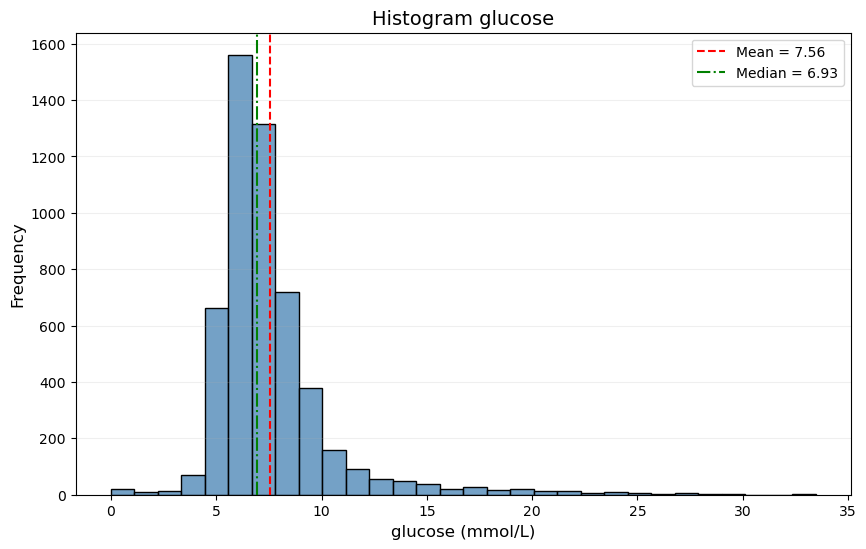

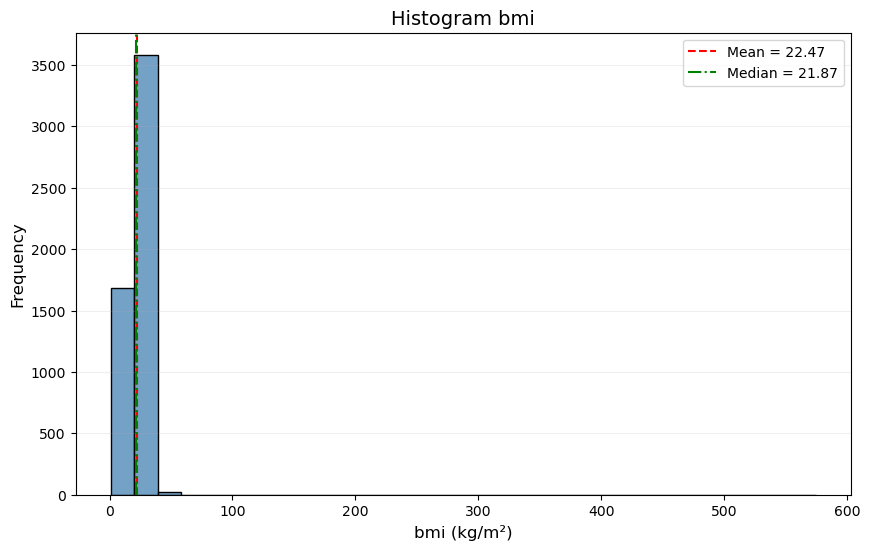

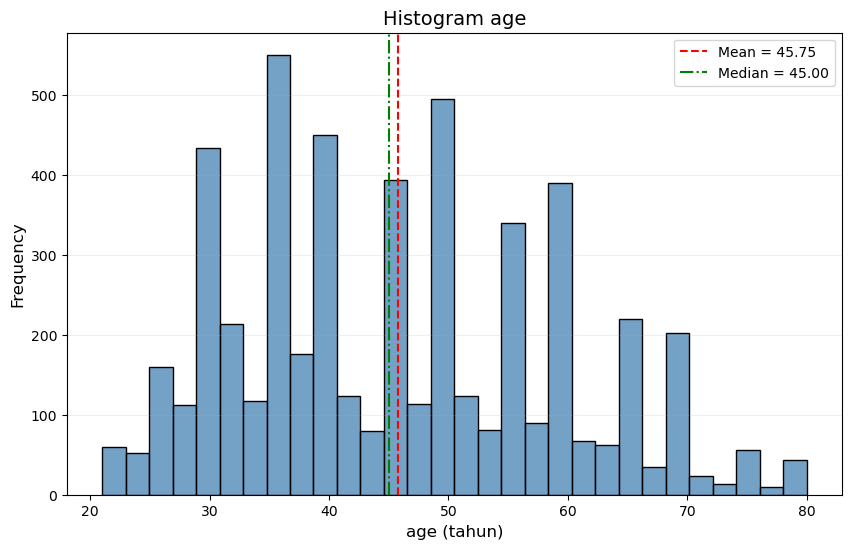

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_histogram(df, column, unit=None, bins=30):
    plt.figure(figsize=(10, 6))
    
    # Plot histogram
    sns.histplot(df[column].dropna(), bins=bins, kde=False, color="steelblue")
    
    # Count mean and median
    mean_val = df[column].mean()
    median_val = df[column].median()
    
    # Plot mean dan median lines
    plt.axvline(mean_val, color="red", linestyle="--", linewidth=1.5, label=f"Mean = {mean_val:.2f}")
    plt.axvline(median_val, color="green", linestyle="-.", linewidth=1.5, label=f"Median = {median_val:.2f}")
    
    plt.title(f"Histogram {column}", fontsize=14)
    
    # X-Axis label
    if unit:
        plt.xlabel(f"{column} ({unit})", fontsize=12)
    else:
        plt.xlabel(column, fontsize=12)

    # Y-Axis label
    plt.ylabel("Frequency", fontsize=12)
    
    plt.legend()
    plt.grid(axis="y", alpha=0.2)
    plt.show()


# Pemanggilan fungsi untuk fitur penting
plot_histogram(df, "glucose", unit="mmol/L")
plot_histogram(df, "bmi", unit="kg/m²")
plot_histogram(df, "age", unit="tahun")


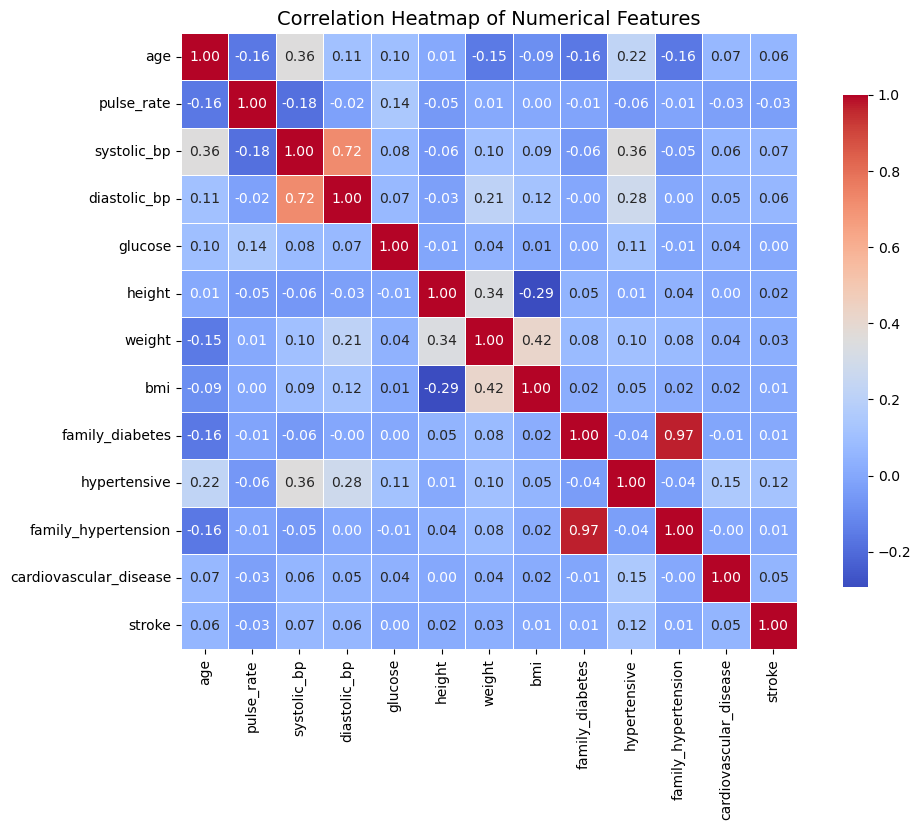

In [9]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Compute correlation
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()


# 2. Preprocessing and Data Export



In [10]:
import sys
sys.path.append("../diabetes-ml/src")

import numpy as np
import os

from preprocessing import load_data, preprocess_dataframe

# 1. Load raw data
df = load_data()

# 2. Run full preprocessing pipeline
(
    X_train,
    X_test,
    y_train,
    y_test,
    X_train_scaled,
    X_test_scaled,
    scaler,
    encoders,
    le_target
) = preprocess_dataframe(df)

# 3. Save processed arrays to data/processed
os.makedirs("../data/processed", exist_ok=True)

np.save("../data/processed/X_train_scaled.npy", X_train_scaled)
np.save("../data/processed/X_test_scaled.npy", X_test_scaled)
np.save("../data/processed/y_train.npy", y_train)
np.save("../data/processed/y_test.npy", y_test)


# 3. Baseline Modeling

In [33]:
import sys
sys.path.append("../src")  # make src importable from notebooks

import numpy as np
import pandas as pd

# Load processed data
X_train_scaled = np.load("../data/processed/X_train_scaled.npy")
X_test_scaled = np.load("../data/processed/X_test_scaled.npy")
y_train = np.load("../data/processed/y_train.npy", allow_pickle=True)
y_test = np.load("../data/processed/y_test.npy", allow_pickle=True)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((4230, 14), (1058, 14), (4230,), (1058,))

In [34]:
from evaluation import evaluate_model

results_baseline = []  # to store results for all models


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


log_reg = LogisticRegression(
    max_iter=2000,
    random_state=42
)

res_lr = evaluate_model(
    log_reg,
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    model_name="Logistic Regression"
)
results_baseline.append(res_lr)



Model: Logistic Regression
Accuracy: 0.9357
ROC AUC : 0.8274

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       990
           1       0.50      0.13      0.21        68

    accuracy                           0.94      1058
   macro avg       0.72      0.56      0.59      1058
weighted avg       0.91      0.94      0.92      1058

Confusion Matrix:
[[981   9]
 [ 59   9]]


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

res_rf = evaluate_model(
    rf,
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    model_name="Random Forest"
)
results_baseline.append(res_rf)


Model: Random Forest
Accuracy: 0.9357
ROC AUC : 0.8585

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       990
           1       0.50      0.12      0.19        68

    accuracy                           0.94      1058
   macro avg       0.72      0.55      0.58      1058
weighted avg       0.91      0.94      0.92      1058

Confusion Matrix:
[[982   8]
 [ 60   8]]


In [15]:
from sklearn.svm import SVC

svm_clf = SVC(
    kernel="rbf",
    probability=True,
    random_state=42
)

res_svm = evaluate_model(
    svm_clf,
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    model_name="SVM (RBF)"
)
results_baseline.append(res_svm)


Model: SVM (RBF)
Accuracy: 0.9376
ROC AUC : 0.7079

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       990
           1       0.57      0.12      0.20        68

    accuracy                           0.94      1058
   macro avg       0.76      0.56      0.58      1058
weighted avg       0.92      0.94      0.92      1058

Confusion Matrix:
[[984   6]
 [ 60   8]]


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=5
)

res_knn = evaluate_model(
    knn,
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    model_name="KNN (k=5)"
)
results_baseline.append(res_knn)


Model: KNN (k=5)
Accuracy: 0.9301
ROC AUC : 0.6907

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       990
           1       0.38      0.15      0.21        68

    accuracy                           0.93      1058
   macro avg       0.66      0.57      0.59      1058
weighted avg       0.91      0.93      0.92      1058

Confusion Matrix:
[[974  16]
 [ 58  10]]


In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()

res_xgb = evaluate_model(
    xgb_clf,
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    model_name="XGBoost"
)
results_baseline.append(res_xgb)

Model: XGBoost
Accuracy: 0.9319
ROC AUC : 0.8449

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       990
           1       0.44      0.21      0.28        68

    accuracy                           0.93      1058
   macro avg       0.69      0.59      0.62      1058
weighted avg       0.91      0.93      0.92      1058

Confusion Matrix:
[[972  18]
 [ 54  14]]


In [18]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    # verbose=False,
    # silent=True,
    logging_level="Silent",
    allow_writing_files=False,
    random_state=42
)

res_cb = evaluate_model(
    cb,
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    model_name="CatBoost"
)
results_baseline.append(res_cb)


Model: CatBoost
Accuracy: 0.9357
ROC AUC : 0.8719

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       990
           1       0.50      0.19      0.28        68

    accuracy                           0.94      1058
   macro avg       0.72      0.59      0.62      1058
weighted avg       0.92      0.94      0.92      1058

Confusion Matrix:
[[977  13]
 [ 55  13]]


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    RocCurveDisplay
)

import pandas as pd

In [20]:
results_baseline_df = pd.DataFrame(results_baseline)
results_baseline_df 

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.935728,0.500000,0.132353,0.209302,0.827377
1,Random Forest,0.935728,0.500000,0.117647,0.190476,0.858452
2,SVM (RBF),0.937618,0.571429,0.117647,0.195122,0.707917
3,KNN (k=5),0.930057,0.384615,0.147059,0.212766,0.690709
4,XGBoost,0.931947,0.437500,0.205882,0.280000,0.844905
5,CatBoost,0.935728,0.500000,0.191176,0.276596,0.871881


In [21]:
# results_df = pd.DataFrame(results_baseline)
# results_df


In [21]:
results_baseline_df.sort_values(by="ROC-AUC", ascending=False)


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
5,CatBoost,0.935728,0.500000,0.191176,0.276596,0.871881
1,Random Forest,0.935728,0.500000,0.117647,0.190476,0.858452
4,XGBoost,0.931947,0.437500,0.205882,0.280000,0.844905
0,Logistic Regression,0.935728,0.500000,0.132353,0.209302,0.827377
2,SVM (RBF),0.937618,0.571429,0.117647,0.195122,0.707917
3,KNN (k=5),0.930057,0.384615,0.147059,0.212766,0.690709


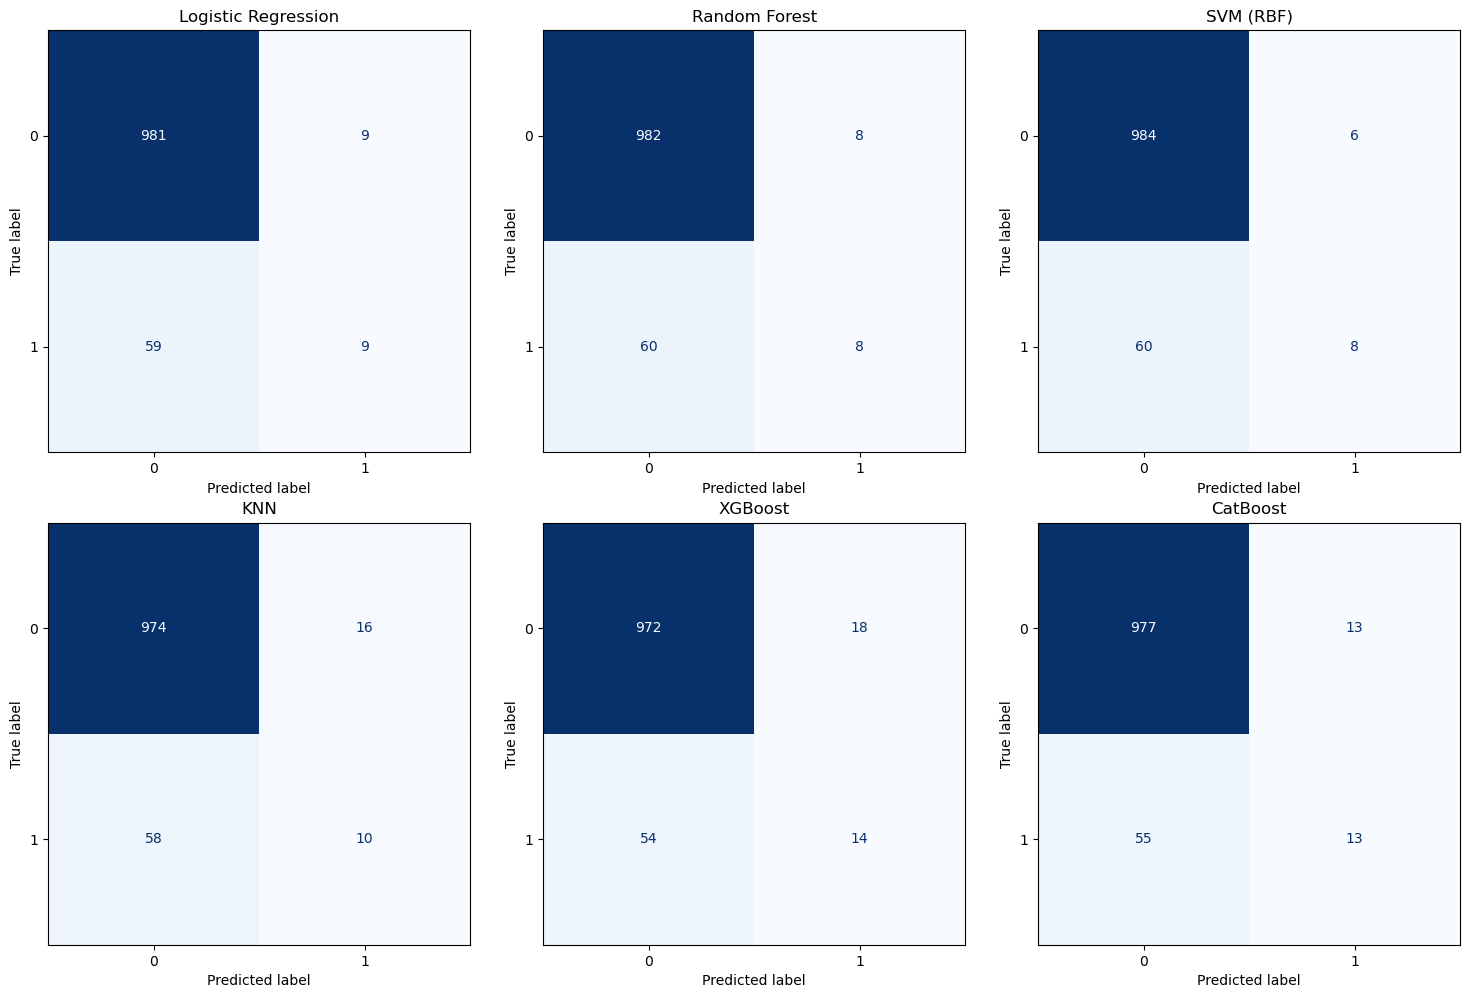

In [24]:
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "SVM (RBF)": svm_clf,
    "KNN": knn,
    "XGBoost": xgb_clf,
    "CatBoost" : cb
}

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 baris x 3 kolom (1 slot kosong)
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=[0, 1]  # 0 = No, 1 = Yes (bisa kamu jelasin di skripsi)
    )
    disp.plot(ax=axes[idx], cmap="Blues", colorbar=False)
    axes[idx].set_title(name)

# Matikan axis kosong kalau jumlah model < jumlah subplot
for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

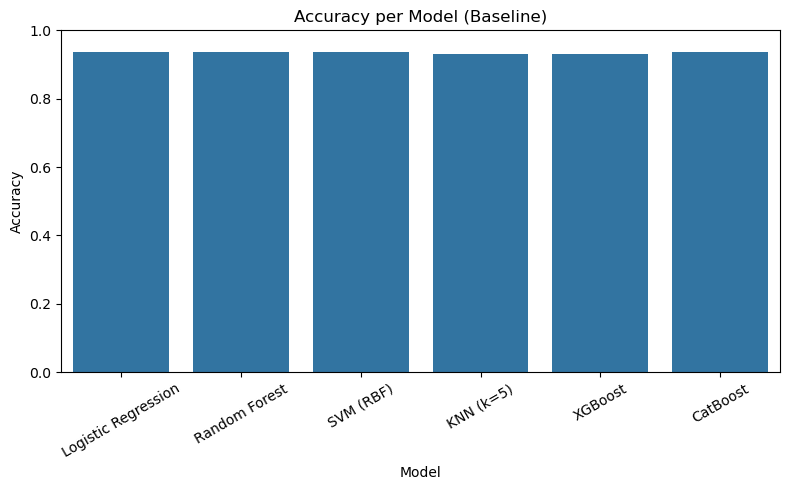

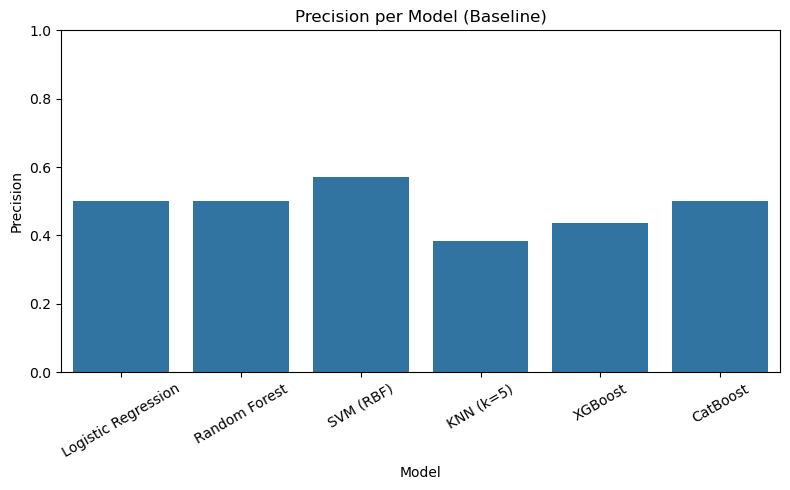

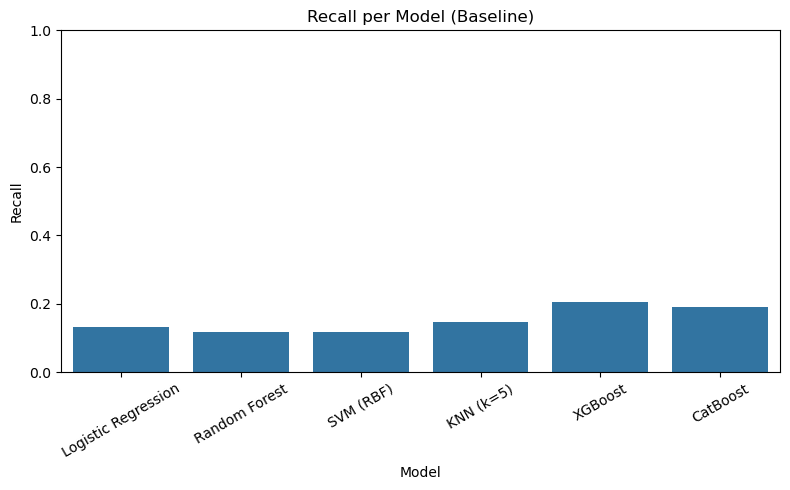

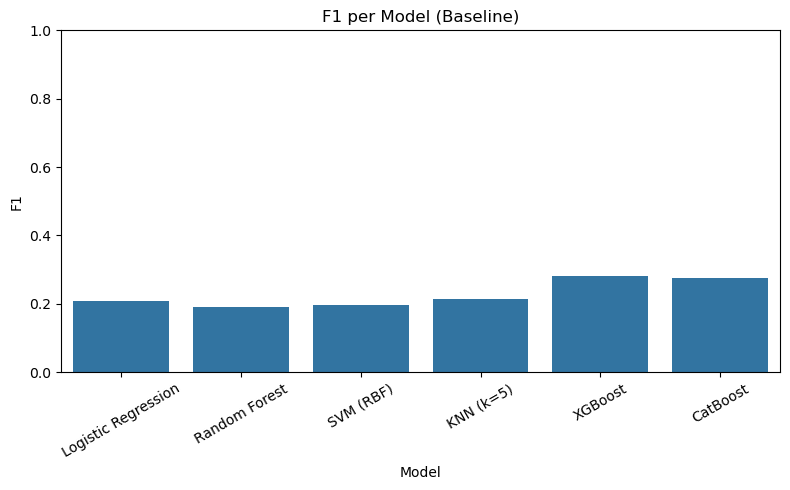

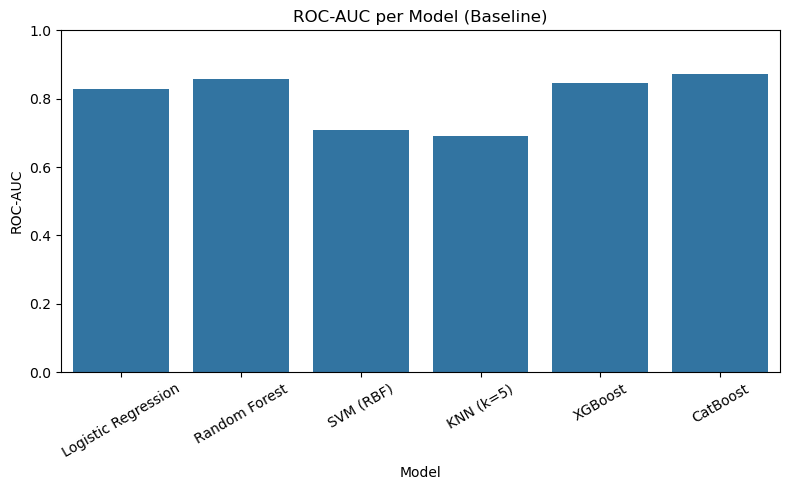

In [25]:
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"]

plt.figure(figsize=(12, 6))
for metric in metrics_to_plot:
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=results_baseline_df,
        x="Model",
        y=metric
    )
    plt.title(f"{metric} per Model (Baseline)")
    plt.ylim(0, 1)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


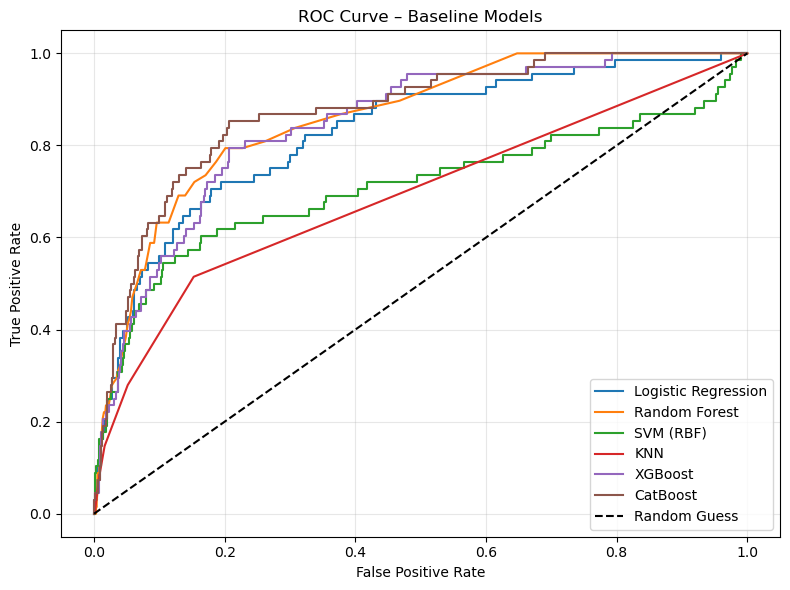

In [26]:
plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X_test_scaled)
        # Normalisasi 0–1
        y_proba = (scores - scores.min()) / (scores.max() - scores.min())
    else:
        continue  # skip jika model tidak punya keduanya

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=name)

# Garis diagonal random guess
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Baseline Models")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [26]:
results_baseline_df = pd.DataFrame(results_baseline)

# 4. Imbalance Handling

In [36]:
import sys
sys.path.append("../src")

from resampling import (
    apply_smote,
    apply_adasyn,
    apply_random_oversample,
    apply_random_undersample,
    apply_smoteenn
)
from evaluation import evaluate_model

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM (RBF)": SVC(kernel="rbf", probability=True, random_state=42),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier()
}



In [40]:
balancing_methods = {
    "RandomOverSampler": apply_random_oversample,
    "RandomUnderSampler": apply_random_undersample,
    "SMOTE": apply_smote,
    "ADASYN": apply_adasyn,
    "SMOTEENN": apply_smoteenn,
}


In [41]:
results_balanced = []

for bal_name, bal_func in balancing_methods.items():

    # Resampling
    X_res, y_res = bal_func(X_train_scaled, y_train)

    for model_name, model in models.items():
        result = evaluate_model(
            model,
            X_res,
            X_test_scaled,
            y_res,
            y_test,
            model_name=f"{model_name} + {bal_name}"
        )
        results_balanced.append(result)


Model: Logistic Regression + RandomOverSampler
Accuracy: 0.8403
ROC AUC : 0.8271

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       990
           1       0.23      0.62      0.33        68

    accuracy                           0.84      1058
   macro avg       0.60      0.74      0.62      1058
weighted avg       0.92      0.84      0.87      1058

Confusion Matrix:
[[847 143]
 [ 26  42]]
Model: Random Forest + RandomOverSampler
Accuracy: 0.9338
ROC AUC : 0.844

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       990
           1       0.46      0.19      0.27        68

    accuracy                           0.93      1058
   macro avg       0.71      0.59      0.62      1058
weighted avg       0.92      0.93      0.92      1058

Confusion Matrix:
[[975  15]
 [ 55  13]]
Model: SVM (RBF) + RandomOverSampler
Accuracy: 0.8507
ROC AUC

In [42]:
results_balanced_df = pd.DataFrame(results_balanced)
results_balanced_df

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression + RandomOverSampler,0.840265,0.227027,0.617647,0.332016,0.827094
1,Random Forest + RandomOverSampler,0.933837,0.464286,0.191176,0.270833,0.844014
2,SVM (RBF) + RandomOverSampler,0.850662,0.241379,0.617647,0.347107,0.821925
3,KNN (k=5) + RandomOverSampler,0.857278,0.187970,0.367647,0.248756,0.686133
4,XGBoost + RandomOverSampler,0.923440,0.385965,0.323529,0.352000,0.843078
5,CatBoost + RandomOverSampler,0.912098,0.333333,0.367647,0.349650,0.852911
6,Logistic Regression + RandomUnderSampler,0.843100,0.236559,0.647059,0.346457,0.819073
7,Random Forest + RandomUnderSampler,0.812854,0.214912,0.720588,0.331081,0.848425
8,SVM (RBF) + RandomUnderSampler,0.840265,0.232804,0.647059,0.342412,0.829078
9,KNN (k=5) + RandomUnderSampler,0.827032,0.219512,0.661765,0.329670,0.821465


In [43]:
results_balanced_df.sort_values(
    by="ROC-AUC",
    ascending=False,
    inplace=True
)

results_balanced_df


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
11,CatBoost + RandomUnderSampler,0.816635,0.226087,0.764706,0.348993,0.859938
5,CatBoost + RandomOverSampler,0.912098,0.333333,0.367647,0.349650,0.852911
7,Random Forest + RandomUnderSampler,0.812854,0.214912,0.720588,0.331081,0.848425
29,CatBoost + SMOTEENN,0.882798,0.297101,0.602941,0.398058,0.845247
1,Random Forest + RandomOverSampler,0.933837,0.464286,0.191176,0.270833,0.844014
4,XGBoost + RandomOverSampler,0.923440,0.385965,0.323529,0.352000,0.843078
13,Random Forest + SMOTE,0.914934,0.333333,0.323529,0.328358,0.839089
25,Random Forest + SMOTEENN,0.863894,0.256410,0.588235,0.357143,0.838206
19,Random Forest + ADASYN,0.913043,0.323529,0.323529,0.323529,0.837626
17,CatBoost + SMOTE,0.922495,0.370370,0.294118,0.327869,0.835591


In [44]:
results_balanced_df.sort_values(
    by="F1",
    ascending=False,
    inplace=True
)

results_balanced_df


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
29,CatBoost + SMOTEENN,0.882798,0.297101,0.602941,0.398058,0.845247
28,XGBoost + SMOTEENN,0.888469,0.298387,0.544118,0.385417,0.833526
25,Random Forest + SMOTEENN,0.863894,0.256410,0.588235,0.357143,0.838206
4,XGBoost + RandomOverSampler,0.923440,0.385965,0.323529,0.352000,0.843078
5,CatBoost + RandomOverSampler,0.912098,0.333333,0.367647,0.349650,0.852911
11,CatBoost + RandomUnderSampler,0.816635,0.226087,0.764706,0.348993,0.859938
22,XGBoost + ADASYN,0.918715,0.359375,0.338235,0.348485,0.811780
2,SVM (RBF) + RandomOverSampler,0.850662,0.241379,0.617647,0.347107,0.821925
6,Logistic Regression + RandomUnderSampler,0.843100,0.236559,0.647059,0.346457,0.819073
12,Logistic Regression + SMOTE,0.837429,0.231959,0.661765,0.343511,0.828209


In [45]:
results_balanced_df.sort_values(
    by="Accuracy",
    ascending=False,
    inplace=True
)

results_balanced_df


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
1,Random Forest + RandomOverSampler,0.933837,0.464286,0.191176,0.270833,0.844014
16,XGBoost + SMOTE,0.926276,0.400000,0.294118,0.338983,0.823247
4,XGBoost + RandomOverSampler,0.923440,0.385965,0.323529,0.352000,0.843078
17,CatBoost + SMOTE,0.922495,0.370370,0.294118,0.327869,0.835591
22,XGBoost + ADASYN,0.918715,0.359375,0.338235,0.348485,0.811780
23,CatBoost + ADASYN,0.918715,0.320000,0.235294,0.271186,0.833838
13,Random Forest + SMOTE,0.914934,0.333333,0.323529,0.328358,0.839089
19,Random Forest + ADASYN,0.913043,0.323529,0.323529,0.323529,0.837626
5,CatBoost + RandomOverSampler,0.912098,0.333333,0.367647,0.349650,0.852911
28,XGBoost + SMOTEENN,0.888469,0.298387,0.544118,0.385417,0.833526


In [46]:
results_baseline_df

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.935728,0.500000,0.132353,0.209302,0.827377
1,Random Forest,0.935728,0.500000,0.117647,0.190476,0.858452
2,SVM (RBF),0.937618,0.571429,0.117647,0.195122,0.707917
3,KNN (k=5),0.930057,0.384615,0.147059,0.212766,0.690709
4,XGBoost,0.931947,0.437500,0.205882,0.280000,0.844905
5,CatBoost,0.935728,0.500000,0.191176,0.276596,0.871881


In [47]:
results_all = pd.concat([results_baseline_df, results_balanced_df], ignore_index=True)
results_all

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.935728,0.500000,0.132353,0.209302,0.827377
1,Random Forest,0.935728,0.500000,0.117647,0.190476,0.858452
2,SVM (RBF),0.937618,0.571429,0.117647,0.195122,0.707917
3,KNN (k=5),0.930057,0.384615,0.147059,0.212766,0.690709
4,XGBoost,0.931947,0.437500,0.205882,0.280000,0.844905
5,CatBoost,0.935728,0.500000,0.191176,0.276596,0.871881
6,Random Forest + RandomOverSampler,0.933837,0.464286,0.191176,0.270833,0.844014
7,XGBoost + SMOTE,0.926276,0.400000,0.294118,0.338983,0.823247
8,XGBoost + RandomOverSampler,0.923440,0.385965,0.323529,0.352000,0.843078
9,CatBoost + SMOTE,0.922495,0.370370,0.294118,0.327869,0.835591


In [50]:
results_all_viz = results_all.copy()

results_all_viz["Sampling_Method"] = results_all_viz["Model"].apply(
    lambda x: x.split("+")[1].strip() if "+" in x else "None"
)

results_all_viz["Model"] = results_all_viz["Model"].apply(
    lambda x: x.split("+")[0].strip()
)


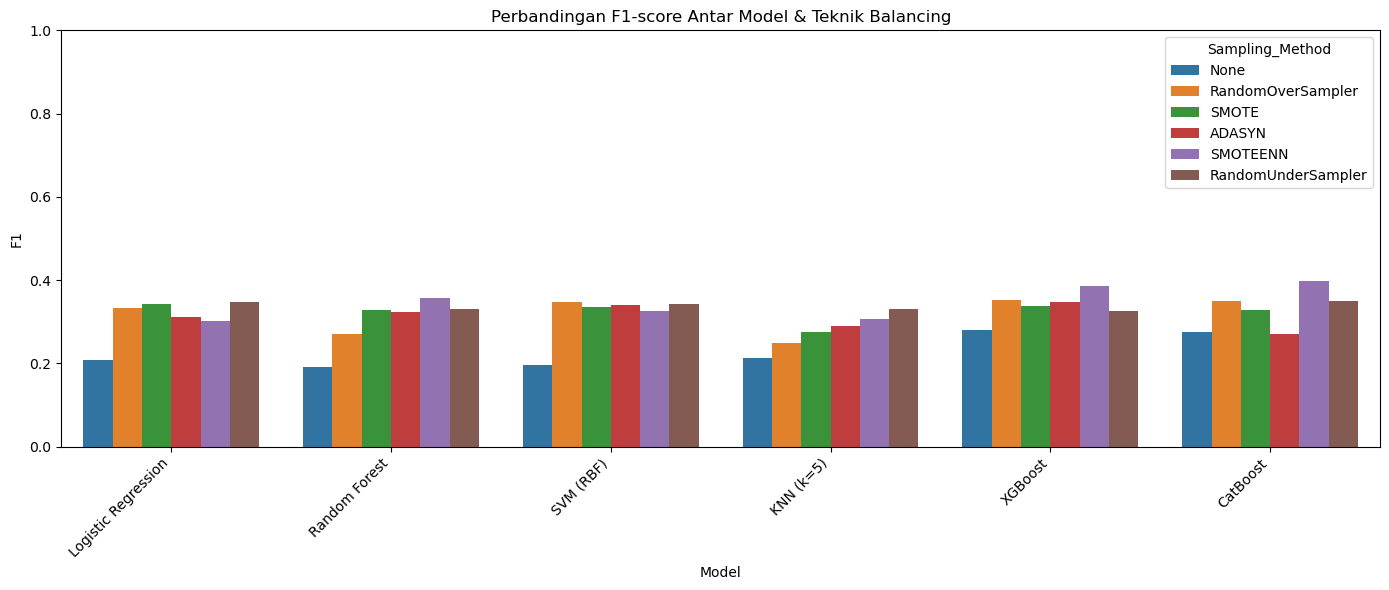

In [51]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data=results_all_viz,
    x="Model",
    y="F1",
    hue="Sampling_Method"
)
plt.xticks(rotation=45, ha='right')
plt.title("Perbandingan F1-score Antar Model & Teknik Balancing")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


# 5. Weighting and Scoring

In [52]:
results_all_weighted = results_all.copy()

In [53]:
weights = {
    "Accuracy": 0.30,
    "F1": 0.40,
    "Precision": 0.10,
    "Recall": 0.10,
    "ROC-AUC": 0.10
}

In [56]:
for metric, w in weights.items():
    results_all_weighted[f"{metric}_weighted"] = results_all_weighted[metric] * w
    
results_all_weighted   


,Model,Accuracy,Precision,Recall,F1,ROC-AUC,Accuracy_weighted,F1_weighted,Precision_weighted,Recall_weighted,ROC-AUC_weighted
0,Logistic Regression,0.935728,0.500000,0.132353,0.209302,0.827377,0.280718,0.083721,0.050000,0.013235,0.082738
1,Random Forest,0.935728,0.500000,0.117647,0.190476,0.858452,0.280718,0.076190,0.050000,0.011765,0.085845
2,SVM (RBF),0.937618,0.571429,0.117647,0.195122,0.707917,0.281285,0.078049,0.057143,0.011765,0.070792
3,KNN (k=5),0.930057,0.384615,0.147059,0.212766,0.690709,0.279017,0.085106,0.038462,0.014706,0.069071
4,XGBoost,0.931947,0.437500,0.205882,0.280000,0.844905,0.279584,0.112000,0.043750,0.020588,0.084490
5,CatBoost,0.935728,0.500000,0.191176,0.276596,0.871881,0.280718,0.110638,0.050000,0.019118,0.087188
6,Random Forest + RandomOverSampler,0.933837,0.464286,0.191176,0.270833,0.844014,0.280151,0.108333,0.046429,0.019118,0.084401
7,XGBoost + SMOTE,0.926276,0.400000,0.294118,0.338983,0.823247,0.277883,0.135593,0.040000,0.029412,0.082325
8,XGBoost + RandomOverSampler,0.923440,0.385965,0.323529,0.352000,0.843078,0.277032,0.140800,0.038596,0.032353,0.084308
9,CatBoost + SMOTE,0.922495,0.370370,0.294118,0.327869,0.835591,0.276749,0.131148,0.037037,0.029412,0.083559


In [64]:
results_scored = results_all.copy()

In [65]:
for metric, w in weights.items():
    results_scored[f"{metric}_weighted"] = results_scored[metric] * w

In [67]:
results_scored["Score"] = (
    results_scored["Accuracy_weighted"] +
    results_scored["F1_weighted"] +
    results_scored["Precision_weighted"] +
    results_scored["Recall_weighted"] +
    results_scored["ROC-AUC_weighted"]
)

results_scored

,Model,Accuracy,Precision,Recall,F1,ROC-AUC,Accuracy_weighted,F1_weighted,Precision_weighted,Recall_weighted,ROC-AUC_weighted,Score
0,Logistic Regression,0.935728,0.500000,0.132353,0.209302,0.827377,0.280718,0.083721,0.050000,0.013235,0.082738,0.510412
1,Random Forest,0.935728,0.500000,0.117647,0.190476,0.858452,0.280718,0.076190,0.050000,0.011765,0.085845,0.504519
2,SVM (RBF),0.937618,0.571429,0.117647,0.195122,0.707917,0.281285,0.078049,0.057143,0.011765,0.070792,0.499034
3,KNN (k=5),0.930057,0.384615,0.147059,0.212766,0.690709,0.279017,0.085106,0.038462,0.014706,0.069071,0.486362
4,XGBoost,0.931947,0.437500,0.205882,0.280000,0.844905,0.279584,0.112000,0.043750,0.020588,0.084490,0.540413
5,CatBoost,0.935728,0.500000,0.191176,0.276596,0.871881,0.280718,0.110638,0.050000,0.019118,0.087188,0.547662
6,Random Forest + RandomOverSampler,0.933837,0.464286,0.191176,0.270833,0.844014,0.280151,0.108333,0.046429,0.019118,0.084401,0.538432
7,XGBoost + SMOTE,0.926276,0.400000,0.294118,0.338983,0.823247,0.277883,0.135593,0.040000,0.029412,0.082325,0.565213
8,XGBoost + RandomOverSampler,0.923440,0.385965,0.323529,0.352000,0.843078,0.277032,0.140800,0.038596,0.032353,0.084308,0.573089
9,CatBoost + SMOTE,0.922495,0.370370,0.294118,0.327869,0.835591,0.276749,0.131148,0.037037,0.029412,0.083559,0.557904


# 6. Ranking

In [119]:
rank_weighted_f1 = results_all_weighted.sort_values(ascending=False, by=["F1_weighted"])
rank_weighted_f1


,Model,Accuracy,Precision,Recall,F1,ROC-AUC,Accuracy_weighted,F1_weighted,Precision_weighted,Recall_weighted,ROC-AUC_weighted
16,CatBoost + SMOTEENN,0.882798,0.297101,0.602941,0.398058,0.845247,0.264839,0.159223,0.029710,0.060294,0.084525
15,XGBoost + SMOTEENN,0.888469,0.298387,0.544118,0.385417,0.833526,0.266541,0.154167,0.029839,0.054412,0.083353
17,Random Forest + SMOTEENN,0.863894,0.256410,0.588235,0.357143,0.838206,0.259168,0.142857,0.025641,0.058824,0.083821
8,XGBoost + RandomOverSampler,0.923440,0.385965,0.323529,0.352000,0.843078,0.277032,0.140800,0.038596,0.032353,0.084308
14,CatBoost + RandomOverSampler,0.912098,0.333333,0.367647,0.349650,0.852911,0.273629,0.139860,0.033333,0.036765,0.085291
29,CatBoost + RandomUnderSampler,0.816635,0.226087,0.764706,0.348993,0.859938,0.244991,0.139597,0.022609,0.076471,0.085994
10,XGBoost + ADASYN,0.918715,0.359375,0.338235,0.348485,0.811780,0.275614,0.139394,0.035938,0.033824,0.081178
19,SVM (RBF) + RandomOverSampler,0.850662,0.241379,0.617647,0.347107,0.821925,0.255198,0.138843,0.024138,0.061765,0.082193
21,Logistic Regression + RandomUnderSampler,0.843100,0.236559,0.647059,0.346457,0.819073,0.252930,0.138583,0.023656,0.064706,0.081907
24,Logistic Regression + SMOTE,0.837429,0.231959,0.661765,0.343511,0.828209,0.251229,0.137405,0.023196,0.066176,0.082821


In [71]:
results_all_weighted.sort_values(ascending=False, by=["Accuracy"], inplace=True)
results_all_weighted

,Model,Accuracy,Precision,Recall,F1,ROC-AUC,Accuracy_weighted,F1_weighted,Precision_weighted,Recall_weighted,ROC-AUC_weighted
2,SVM (RBF),0.937618,0.571429,0.117647,0.195122,0.707917,0.281285,0.078049,0.057143,0.011765,0.070792
1,Random Forest,0.935728,0.500000,0.117647,0.190476,0.858452,0.280718,0.076190,0.050000,0.011765,0.085845
0,Logistic Regression,0.935728,0.500000,0.132353,0.209302,0.827377,0.280718,0.083721,0.050000,0.013235,0.082738
5,CatBoost,0.935728,0.500000,0.191176,0.276596,0.871881,0.280718,0.110638,0.050000,0.019118,0.087188
6,Random Forest + RandomOverSampler,0.933837,0.464286,0.191176,0.270833,0.844014,0.280151,0.108333,0.046429,0.019118,0.084401
4,XGBoost,0.931947,0.437500,0.205882,0.280000,0.844905,0.279584,0.112000,0.043750,0.020588,0.084490
3,KNN (k=5),0.930057,0.384615,0.147059,0.212766,0.690709,0.279017,0.085106,0.038462,0.014706,0.069071
7,XGBoost + SMOTE,0.926276,0.400000,0.294118,0.338983,0.823247,0.277883,0.135593,0.040000,0.029412,0.082325
8,XGBoost + RandomOverSampler,0.923440,0.385965,0.323529,0.352000,0.843078,0.277032,0.140800,0.038596,0.032353,0.084308
9,CatBoost + SMOTE,0.922495,0.370370,0.294118,0.327869,0.835591,0.276749,0.131148,0.037037,0.029412,0.083559


In [72]:
results_all_weighted.sort_values(ascending=False, by=["ROC-AUC"], inplace=True)
results_all_weighted

,Model,Accuracy,Precision,Recall,F1,ROC-AUC,Accuracy_weighted,F1_weighted,Precision_weighted,Recall_weighted,ROC-AUC_weighted
5,CatBoost,0.935728,0.500000,0.191176,0.276596,0.871881,0.280718,0.110638,0.050000,0.019118,0.087188
29,CatBoost + RandomUnderSampler,0.816635,0.226087,0.764706,0.348993,0.859938,0.244991,0.139597,0.022609,0.076471,0.085994
1,Random Forest,0.935728,0.500000,0.117647,0.190476,0.858452,0.280718,0.076190,0.050000,0.011765,0.085845
14,CatBoost + RandomOverSampler,0.912098,0.333333,0.367647,0.349650,0.852911,0.273629,0.139860,0.033333,0.036765,0.085291
30,Random Forest + RandomUnderSampler,0.812854,0.214912,0.720588,0.331081,0.848425,0.243856,0.132432,0.021491,0.072059,0.084843
16,CatBoost + SMOTEENN,0.882798,0.297101,0.602941,0.398058,0.845247,0.264839,0.159223,0.029710,0.060294,0.084525
4,XGBoost,0.931947,0.437500,0.205882,0.280000,0.844905,0.279584,0.112000,0.043750,0.020588,0.084490
6,Random Forest + RandomOverSampler,0.933837,0.464286,0.191176,0.270833,0.844014,0.280151,0.108333,0.046429,0.019118,0.084401
8,XGBoost + RandomOverSampler,0.923440,0.385965,0.323529,0.352000,0.843078,0.277032,0.140800,0.038596,0.032353,0.084308
12,Random Forest + SMOTE,0.914934,0.333333,0.323529,0.328358,0.839089,0.274480,0.131343,0.033333,0.032353,0.083909


In [73]:
results_all_weighted.sort_values(ascending=False, by=["F1","Accuracy","ROC-AUC"], inplace=True)
results_all_weighted

,Model,Accuracy,Precision,Recall,F1,ROC-AUC,Accuracy_weighted,F1_weighted,Precision_weighted,Recall_weighted,ROC-AUC_weighted
16,CatBoost + SMOTEENN,0.882798,0.297101,0.602941,0.398058,0.845247,0.264839,0.159223,0.029710,0.060294,0.084525
15,XGBoost + SMOTEENN,0.888469,0.298387,0.544118,0.385417,0.833526,0.266541,0.154167,0.029839,0.054412,0.083353
17,Random Forest + SMOTEENN,0.863894,0.256410,0.588235,0.357143,0.838206,0.259168,0.142857,0.025641,0.058824,0.083821
8,XGBoost + RandomOverSampler,0.923440,0.385965,0.323529,0.352000,0.843078,0.277032,0.140800,0.038596,0.032353,0.084308
14,CatBoost + RandomOverSampler,0.912098,0.333333,0.367647,0.349650,0.852911,0.273629,0.139860,0.033333,0.036765,0.085291
29,CatBoost + RandomUnderSampler,0.816635,0.226087,0.764706,0.348993,0.859938,0.244991,0.139597,0.022609,0.076471,0.085994
10,XGBoost + ADASYN,0.918715,0.359375,0.338235,0.348485,0.811780,0.275614,0.139394,0.035938,0.033824,0.081178
19,SVM (RBF) + RandomOverSampler,0.850662,0.241379,0.617647,0.347107,0.821925,0.255198,0.138843,0.024138,0.061765,0.082193
21,Logistic Regression + RandomUnderSampler,0.843100,0.236559,0.647059,0.346457,0.819073,0.252930,0.138583,0.023656,0.064706,0.081907
24,Logistic Regression + SMOTE,0.837429,0.231959,0.661765,0.343511,0.828209,0.251229,0.137405,0.023196,0.066176,0.082821


In [68]:
results_scored.sort_values(ascending=False, by=["Score"])

,Model,Accuracy,Precision,Recall,F1,ROC-AUC,Accuracy_weighted,F1_weighted,Precision_weighted,Recall_weighted,ROC-AUC_weighted,Score
16,CatBoost + SMOTEENN,0.882798,0.297101,0.602941,0.398058,0.845247,0.264839,0.159223,0.029710,0.060294,0.084525,0.598592
15,XGBoost + SMOTEENN,0.888469,0.298387,0.544118,0.385417,0.833526,0.266541,0.154167,0.029839,0.054412,0.083353,0.588310
8,XGBoost + RandomOverSampler,0.923440,0.385965,0.323529,0.352000,0.843078,0.277032,0.140800,0.038596,0.032353,0.084308,0.573089
17,Random Forest + SMOTEENN,0.863894,0.256410,0.588235,0.357143,0.838206,0.259168,0.142857,0.025641,0.058824,0.083821,0.570310
29,CatBoost + RandomUnderSampler,0.816635,0.226087,0.764706,0.348993,0.859938,0.244991,0.139597,0.022609,0.076471,0.085994,0.569661
14,CatBoost + RandomOverSampler,0.912098,0.333333,0.367647,0.349650,0.852911,0.273629,0.139860,0.033333,0.036765,0.085291,0.568879
10,XGBoost + ADASYN,0.918715,0.359375,0.338235,0.348485,0.811780,0.275614,0.139394,0.035938,0.033824,0.081178,0.565947
7,XGBoost + SMOTE,0.926276,0.400000,0.294118,0.338983,0.823247,0.277883,0.135593,0.040000,0.029412,0.082325,0.565213
19,SVM (RBF) + RandomOverSampler,0.850662,0.241379,0.617647,0.347107,0.821925,0.255198,0.138843,0.024138,0.061765,0.082193,0.562137
21,Logistic Regression + RandomUnderSampler,0.843100,0.236559,0.647059,0.346457,0.819073,0.252930,0.138583,0.023656,0.064706,0.081907,0.561782


# 7. Threshold

In [79]:
threshold = {
    "Accuracy": results_baseline_df["Accuracy"].max(),
    "F1": results_baseline_df["F1"].max(),
    "ROC-AUC": results_baseline_df["Precision"].max()
}

threshold

{'Accuracy': 0.9376181474480151, 'F1': 0.28, 'ROC-AUC': 0.5714285714285714}

In [90]:
threshold_compare = results_balanced_df.copy()

In [91]:
threshold_compare["Above_ACC"] = threshold_compare["Accuracy"] >= threshold["Accuracy"]
threshold_compare["Above_F1"] = threshold_compare["F1"] >= threshold["F1"]
threshold_compare["Above_ROC-AUC"] = threshold_compare["ROC-AUC"] >= threshold["ROC-AUC"]

In [92]:
above_f1 = threshold_compare[threshold_compare["Above_F1"]]
above_f1

,Model,Accuracy,Precision,Recall,F1,ROC-AUC,Above_ACC,Above_F1,Above_ROC-AUC
16,XGBoost + SMOTE,0.926276,0.400000,0.294118,0.338983,0.823247,False,True,True
4,XGBoost + RandomOverSampler,0.923440,0.385965,0.323529,0.352000,0.843078,False,True,True
17,CatBoost + SMOTE,0.922495,0.370370,0.294118,0.327869,0.835591,False,True,True
22,XGBoost + ADASYN,0.918715,0.359375,0.338235,0.348485,0.811780,False,True,True
13,Random Forest + SMOTE,0.914934,0.333333,0.323529,0.328358,0.839089,False,True,True
19,Random Forest + ADASYN,0.913043,0.323529,0.323529,0.323529,0.837626,False,True,True
5,CatBoost + RandomOverSampler,0.912098,0.333333,0.367647,0.349650,0.852911,False,True,True
28,XGBoost + SMOTEENN,0.888469,0.298387,0.544118,0.385417,0.833526,False,True,True
29,CatBoost + SMOTEENN,0.882798,0.297101,0.602941,0.398058,0.845247,False,True,True
25,Random Forest + SMOTEENN,0.863894,0.256410,0.588235,0.357143,0.838206,False,True,True


In [94]:
above_all = threshold_compare[
    threshold_compare["Above_F1"] &
    threshold_compare["Above_ROC-AUC"]
]
above_all

,Model,Accuracy,Precision,Recall,F1,ROC-AUC,Above_ACC,Above_F1,Above_ROC-AUC
16,XGBoost + SMOTE,0.926276,0.400000,0.294118,0.338983,0.823247,False,True,True
4,XGBoost + RandomOverSampler,0.923440,0.385965,0.323529,0.352000,0.843078,False,True,True
17,CatBoost + SMOTE,0.922495,0.370370,0.294118,0.327869,0.835591,False,True,True
22,XGBoost + ADASYN,0.918715,0.359375,0.338235,0.348485,0.811780,False,True,True
13,Random Forest + SMOTE,0.914934,0.333333,0.323529,0.328358,0.839089,False,True,True
19,Random Forest + ADASYN,0.913043,0.323529,0.323529,0.323529,0.837626,False,True,True
5,CatBoost + RandomOverSampler,0.912098,0.333333,0.367647,0.349650,0.852911,False,True,True
28,XGBoost + SMOTEENN,0.888469,0.298387,0.544118,0.385417,0.833526,False,True,True
29,CatBoost + SMOTEENN,0.882798,0.297101,0.602941,0.398058,0.845247,False,True,True
25,Random Forest + SMOTEENN,0.863894,0.256410,0.588235,0.357143,0.838206,False,True,True


In [95]:
viz_thresh = results_all_viz[results_all_viz["Sampling_Method"] != "None"]

In [98]:
def plot_threshold(metric, threshold_value):
    plt.figure(figsize=(16, 6))

    sns.barplot(
        data=viz_thresh,
        x="Model",
        y=metric,
        hue = "Sampling_Method"
    )
    
    plt.axhline(threshold_value, color="red", linestyle="--", label="Baseline Threshold")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.legend()
    plt.tight_layout()
    plt.show()

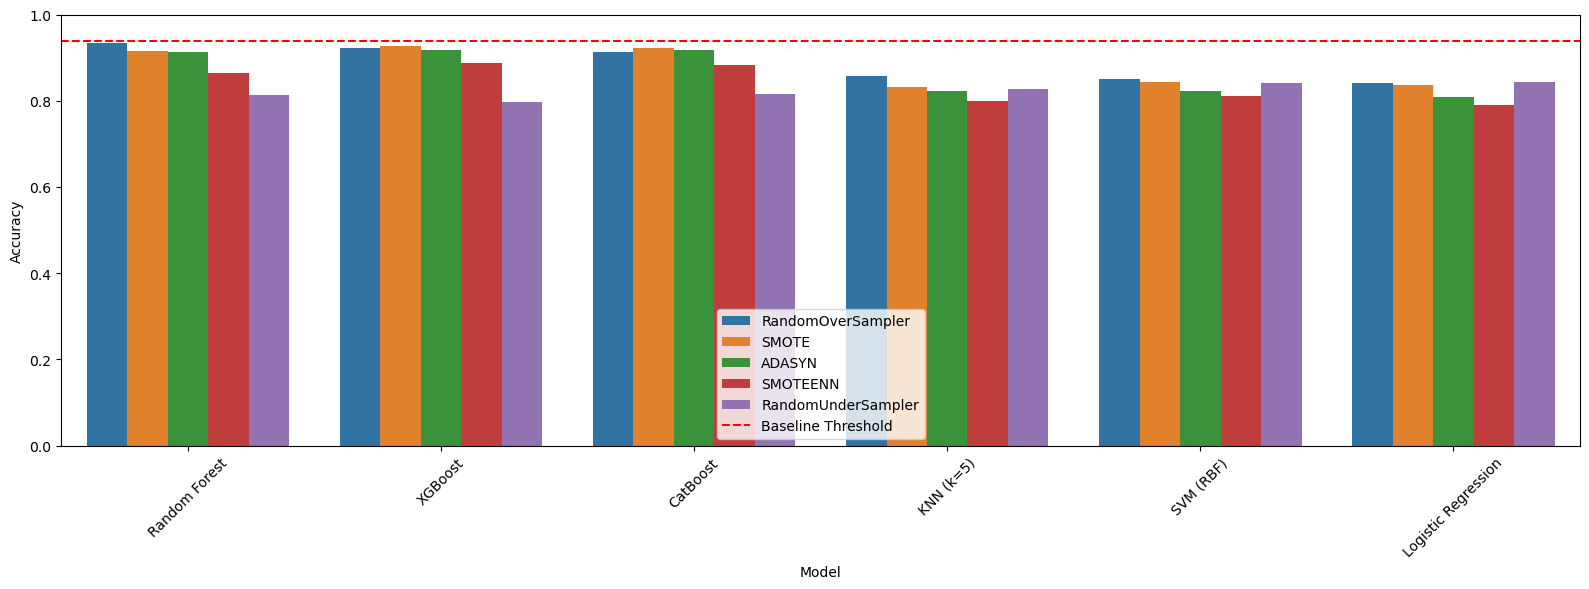

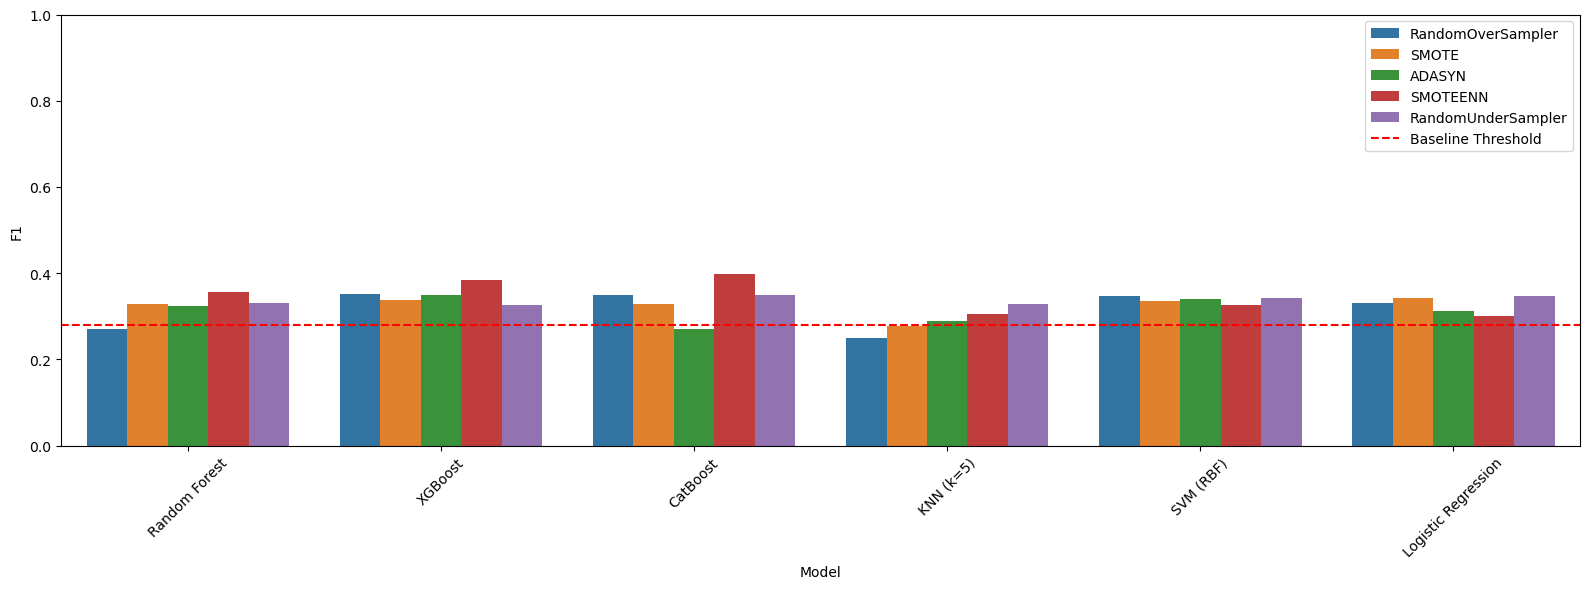

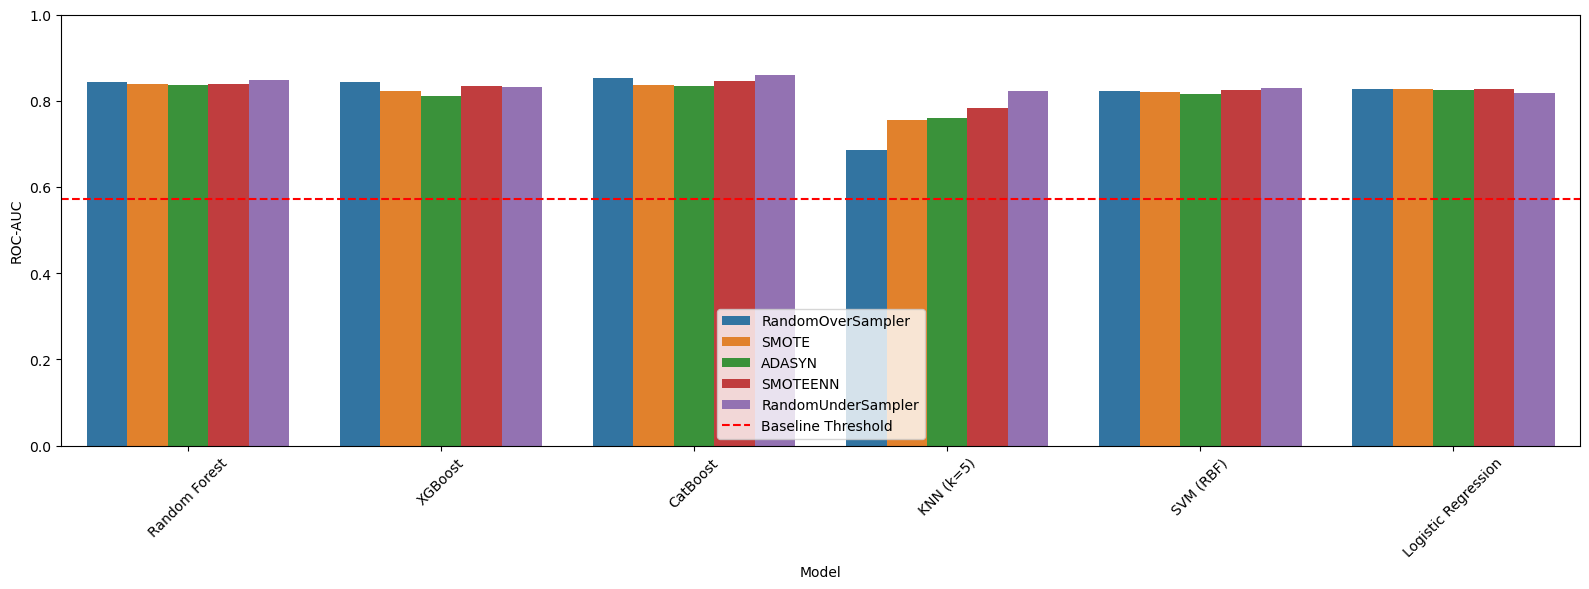

In [99]:
plot_threshold("Accuracy", threshold["Accuracy"])
plot_threshold("F1", threshold["F1"])
plot_threshold("ROC-AUC", threshold["ROC-AUC"])

# 8. Tuning

In [101]:
from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN(random_state=42)
X_train_final, y_train_final = smoteenn.fit_resample(X_train_scaled, y_train)


In [102]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb_base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "gamma": [0, 1],
    "min_child_weight": [1, 3]
}

grid = GridSearchCV(
    xgb_base,
    param_grid,
    scoring="f1",
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train_final, y_train_final)

best_grid_model = grid.best_estimator_
best_grid_params = grid.best_params_
best_grid_params


14150.95s - Error patching args (debugger not attached to subprocess).
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ml/lib/python3.12/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_monkey.py", line 541, in patch_args
    new_args.append(_get_python_c_args(host, port, code, unquoted_args, SetupHolder.setup))
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/ml/lib/python3.12/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_monkey.py", line 193, in _get_python_c_args
    if "__future__" in code:
       ^^^^^^^^^^^^^^^^^^^^
TypeError: a bytes-like object is required, not 'str'


Fitting 3 folds for each of 972 candidates, totalling 2916 fits


0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; tota

{'colsample_bytree': 1.0,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 300,
 'subsample': 0.7}

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    "n_estimators": randint(100, 400),
    "learning_rate": uniform(0.01, 0.2),
    "max_depth": randint(3, 10),
    "subsample": uniform(0.5, 0.5),
    "colsample_bytree": uniform(0.5, 0.5),
    "gamma": uniform(0, 2),
    "min_child_weight": randint(1, 6),
}

random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=40,
    scoring="f1",
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train_final, y_train_final)

best_random_model = random_search.best_estimator_
best_random_params = random_search.best_params_
best_random_params


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END colsample_bytree=0.6872700594236812, gamma=1.9014286128198323, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=5, n_estimators=202, subsample=0.7229163764267956; total time=   0.1s
[CV] END colsample_bytree=0.6872700594236812, gamma=1.9014286128198323, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=5, n_estimators=202, subsample=0.7229163764267956; total time=   0.1s
[CV] END colsample_bytree=0.6872700594236812, gamma=1.9014286128198323, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=5, n_estimators=202, subsample=0.7229163764267956; total time=   0.1s
[CV] END colsample_bytree=0.9692763545078751, gamma=0.0015575316820286567, learning_rate=0.20844231185824352, max_depth=3, min_child_weight=4, n_estimators=121, subsample=0.5035331526098588; total time=   0.1s
[CV] END colsample_bytree=0.9692763545078751, gamma=0.0015575316820286567, learning_rate=0.2084423118582435

{'colsample_bytree': np.float64(0.92650472773368),
 'gamma': np.float64(0.5888977841391714),
 'learning_rate': np.float64(0.08701954572038505),
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 355,
 'subsample': np.float64(0.7426399371381578)}

In [110]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

def objective(trial):
    
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 400),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 2),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 6),
        "eval_metric": "logloss",
        "objective": "binary:logistic",
        "random_state": 42,
    }

    model = XGBClassifier(**params)
    model.fit(X_train_final, y_train_final)

    y_pred = model.predict(X_test_scaled)
    return f1_score(y_test, y_pred)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

best_optuna_params = study.best_trial.params
best_optuna_params

[I 2025-12-09 14:05:28,961] A new study created in memory with name: no-name-94ea335d-2e9f-4193-b684-b25022876fda
[I 2025-12-09 14:05:29,201] Trial 0 finished with value: 0.4095238095238095 and parameters: {'n_estimators': 207, 'learning_rate': 0.1312243639244879, 'max_depth': 4, 'subsample': 0.7420228674259141, 'colsample_bytree': 0.6128631882747928, 'gamma': 0.2913605727596773, 'min_child_weight': 5}. Best is trial 0 with value: 0.4095238095238095.
[I 2025-12-09 14:05:29,681] Trial 1 finished with value: 0.39805825242718446 and parameters: {'n_estimators': 393, 'learning_rate': 0.19399527272023295, 'max_depth': 6, 'subsample': 0.8300670840139015, 'colsample_bytree': 0.6536842954731896, 'gamma': 0.9261453869661684, 'min_child_weight': 5}. Best is trial 0 with value: 0.4095238095238095.
[I 2025-12-09 14:05:29,880] Trial 2 finished with value: 0.38235294117647056 and parameters: {'n_estimators': 229, 'learning_rate': 0.23200325902720662, 'max_depth': 9, 'subsample': 0.9216171942354772, 

{'n_estimators': 207,
 'learning_rate': 0.1312243639244879,
 'max_depth': 4,
 'subsample': 0.7420228674259141,
 'colsample_bytree': 0.6128631882747928,
 'gamma': 0.2913605727596773,
 'min_child_weight': 5}

In [111]:
best_optuna_model = XGBClassifier(**best_optuna_params)
best_optuna_model.fit(X_train_final, y_train_final)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6128631882747928, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.2913605727596773, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1312243639244879,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=207, n_jobs=None,
              num_parallel_tree=None, ...)

In [112]:
results_tuning = pd.DataFrame([
    {
        "Method": "GridSearch",
        **evaluate_model(best_grid_model, X_train_final, X_test_scaled, y_train_final, y_test)
    },
    {
        "Method": "RandomSearch",
        **evaluate_model(best_random_model, X_train_final, X_test_scaled, y_train_final, y_test)
    },
    {
        "Method": "Optuna",
        **evaluate_model(best_optuna_model, X_train_final, X_test_scaled, y_train_final, y_test)
    }
])

results_tuning

Model: Model
Accuracy: 0.8885
ROC AUC : 0.8473

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       990
           1       0.30      0.57      0.40        68

    accuracy                           0.89      1058
   macro avg       0.64      0.74      0.67      1058
weighted avg       0.93      0.89      0.90      1058

Confusion Matrix:
[[901  89]
 [ 29  39]]
Model: Model
Accuracy: 0.8837
ROC AUC : 0.8389

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       990
           1       0.30      0.59      0.39        68

    accuracy                           0.88      1058
   macro avg       0.63      0.75      0.66      1058
weighted avg       0.93      0.88      0.90      1058

Confusion Matrix:
[[895  95]
 [ 28  40]]
Model: Model
Accuracy: 0.879
ROC AUC : 0.8421

Classification Report:
              precision    recall  f1-score   suppor

,Method,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,GridSearch,Model,0.888469,0.304688,0.573529,0.397959,0.847341
1,RandomSearch,Model,0.883743,0.296296,0.588235,0.394089,0.838859
2,Optuna,Model,0.879017,0.288732,0.602941,0.390476,0.842083


In [113]:
model_final = best_optuna_model

# 9. XAI

466.24s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


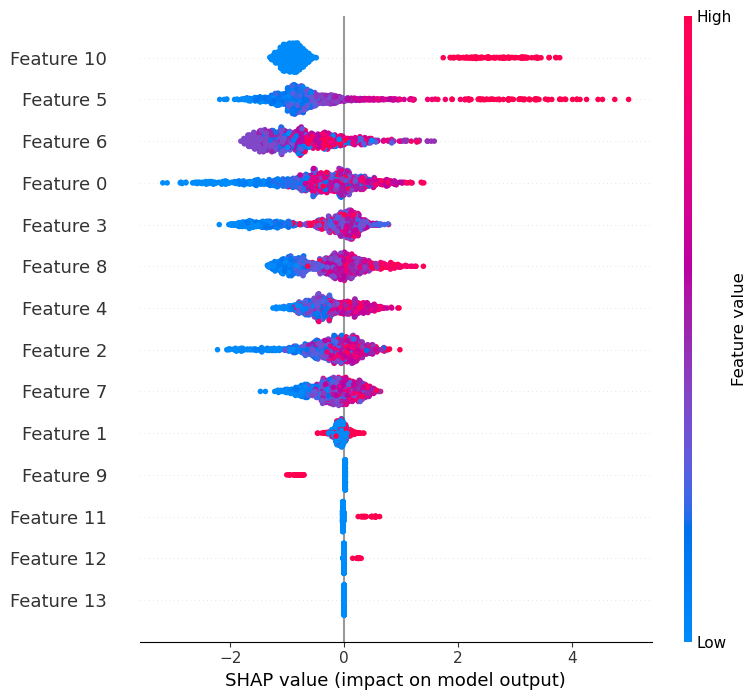

In [ ]:
%pip install shap
import shap
explainer = shap.TreeExplainer(model_final)
shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled)
